In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [2]:
from src.models.prediction_utils_relatorio import (
    load_all_models, 
    predict_with_model_and_scalers,
    evaluate_models_save_metrics,
    plot_pred_vs_measured,
    plot_predictions_by_combination,
    plot_residuals,
    plot_residuals_by_combination,
    plot_predictions_by_combination_window,
    check_baseline_predictions,
    check_baseline_predictions_depth,
    plot_predictions_by_combination_bars_window,
    plot_predictions_by_combination_bars_window_2
)
from src.utils.helpers import DataLoader

In [3]:
M = ['model_9']
D = ['dataset_D']

TOC PREDICTION - MODEL PREDICTION PIPELINE

Loading input data...
    DEPTH  COT_anl    COT    CAL     GR  NPHI     PE  RHOB     DT      RT
0  4916.6      NaN  3.590  10.54  23.01  25.0  10.05  2.71  54.12  137.99
1  4917.0      NaN  0.101   9.61  52.35  29.0   7.83  2.57  58.21   54.81
2  4917.0      NaN  0.086   9.61  52.35  29.0   7.83  2.57  58.21   54.81
3  4917.1      NaN  0.517   9.10  56.65  25.0   6.94  2.60  60.08   60.39
4  4918.6      NaN  0.337   8.79   8.12  18.0   4.66  2.42  75.11  200.31
Data loaded successfully: (168, 10)
Available columns: ['DEPTH', 'COT_anl', 'COT', 'CAL', 'GR', 'NPHI', 'PE', 'RHOB', 'DT', 'RT']

Loading trained models from: models/model_9
Loading model: model_9_FFNN
✓ Model model_9_FFNN loaded successfully
Loading model: model_9_XGB
✓ Model model_9_XGB loaded successfully

Loaded 2 models:
  - model_9_FFNN
  - model_9_XGB

Finding compatible models based on available features...
✓ model_9_FFNN - Features: ['NPHI', 'GR', 'DT', 'RHOB']
✓ model_9_XGB 

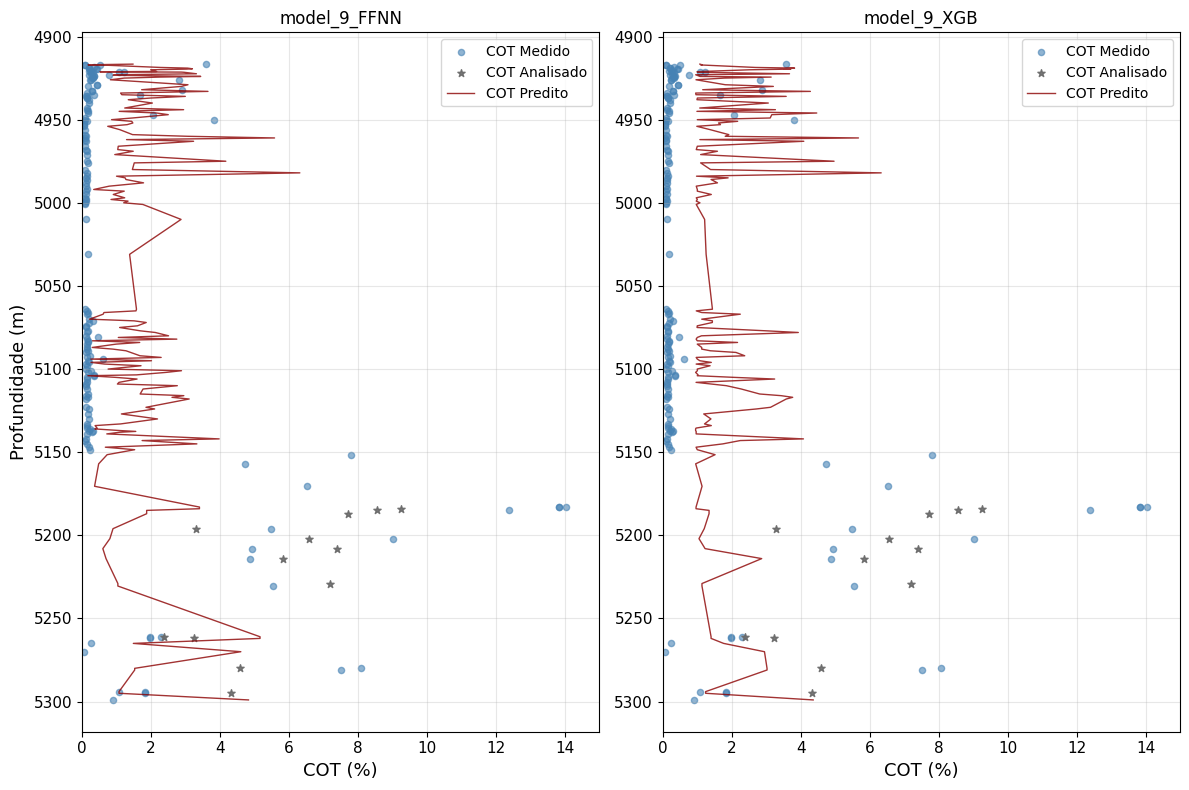

Predictions comparison (window STD) plot for combination 9 saved to: results/Relatorio/model_9/dataset_D/predictions_comparison_window_9_predictions.png


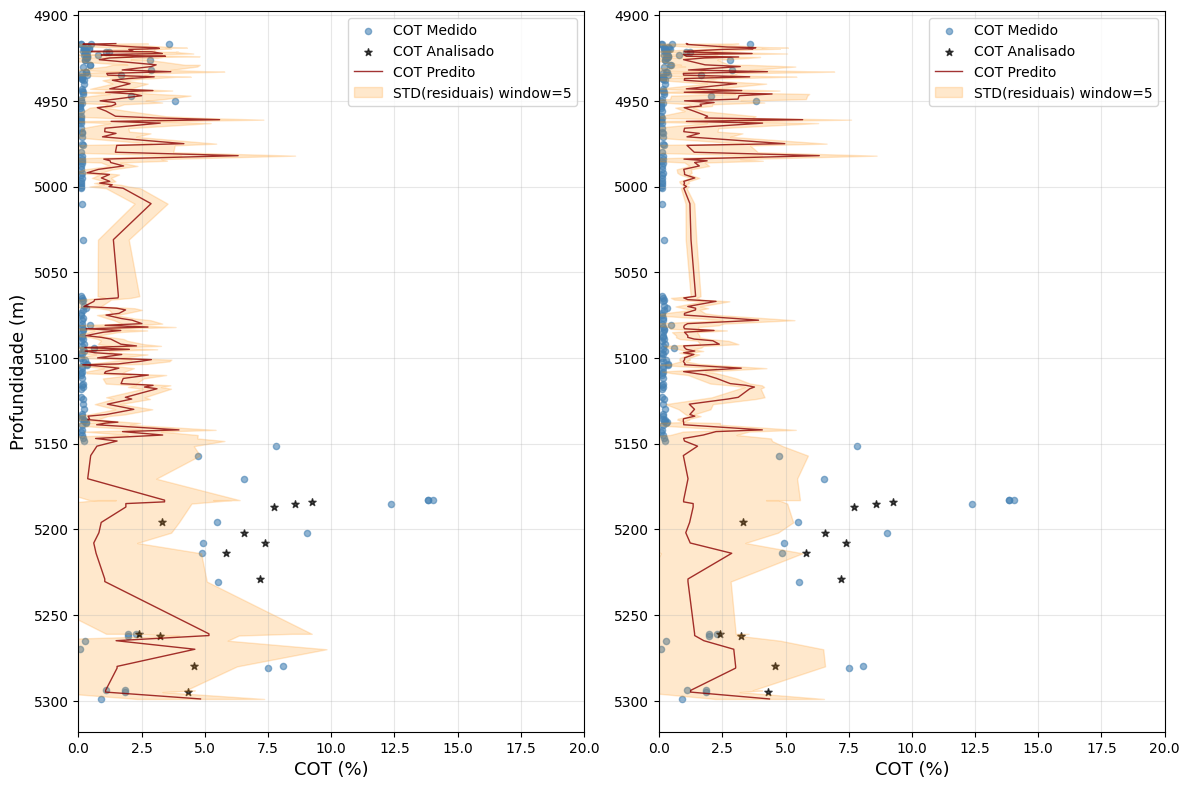

Prediction bars (pointwise) plot for combination 9 saved to: results/Relatorio/model_9/dataset_D/predictions_bars_pointwise_9_predictions.png


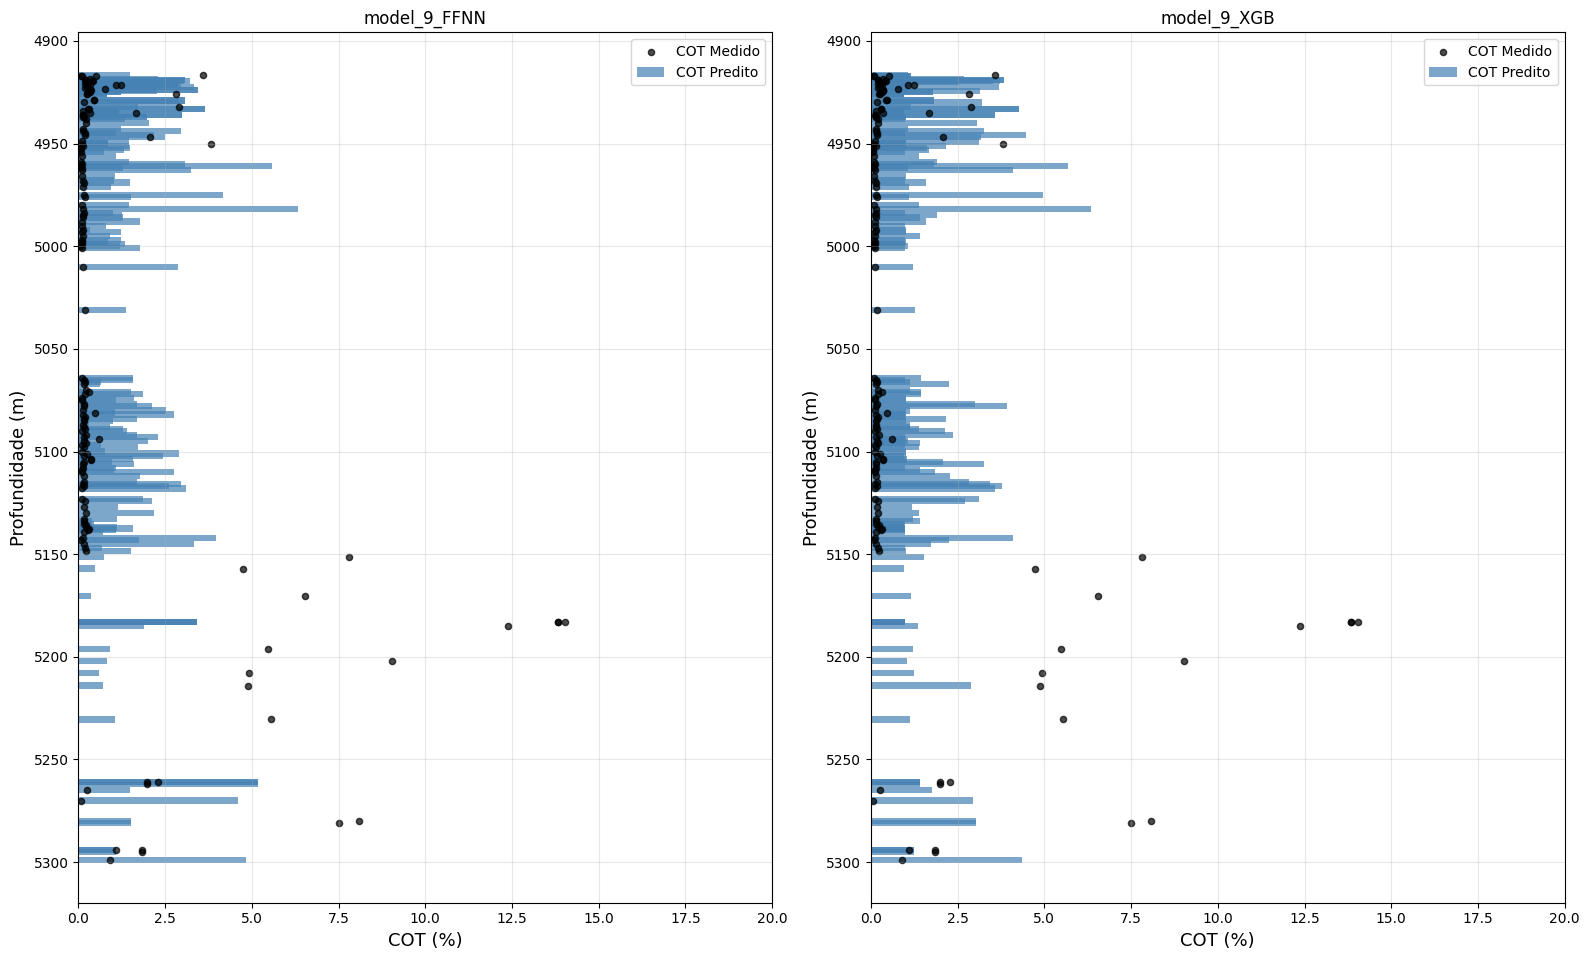

Prediction bars (pointwise) plot for combination 9 saved to: results/Relatorio/model_9/dataset_D/predictions_bars_pointwise_2_9_predictions.png


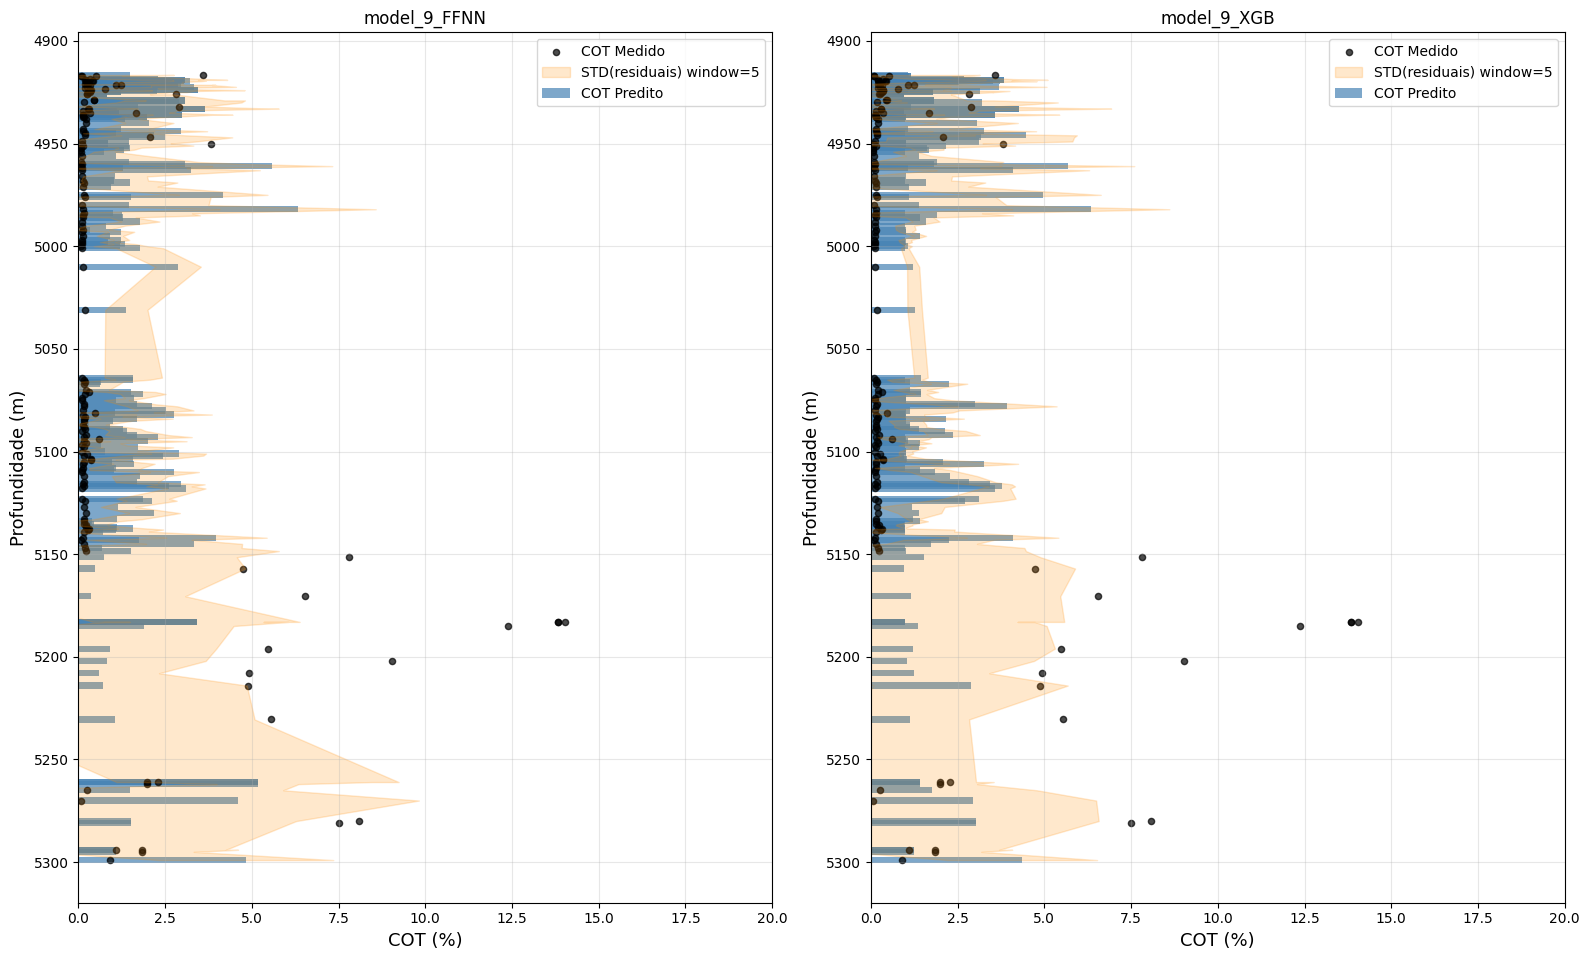

Predicted vs measured plot saved to: results/Relatorio/model_9/dataset_D/pred_vs_measured/pred_vs_measured_model_9_FFNN_predictions.png


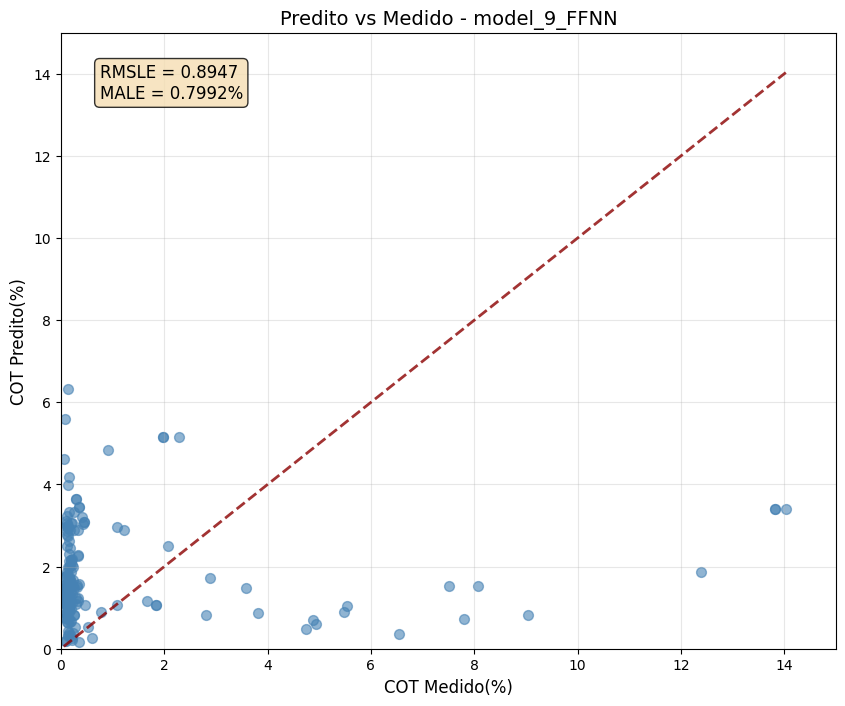

Predicted vs measured plot saved to: results/Relatorio/model_9/dataset_D/pred_vs_measured/pred_vs_measured_model_9_XGB_predictions.png


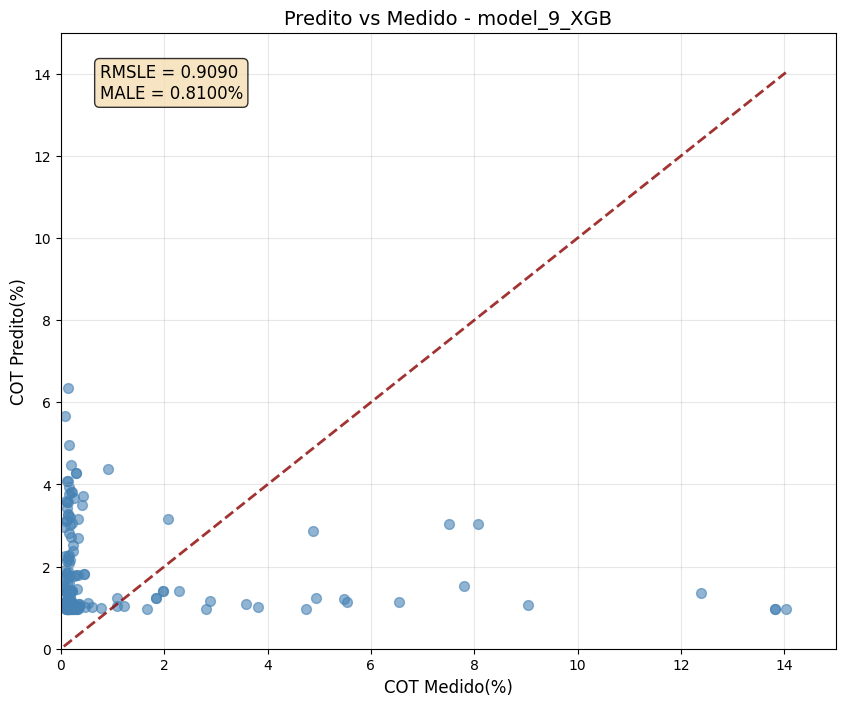

Residual plot for model_9_FFNN saved to: results/Relatorio/model_9/dataset_D/residuals/residuals_model_9_FFNN_predictions.png


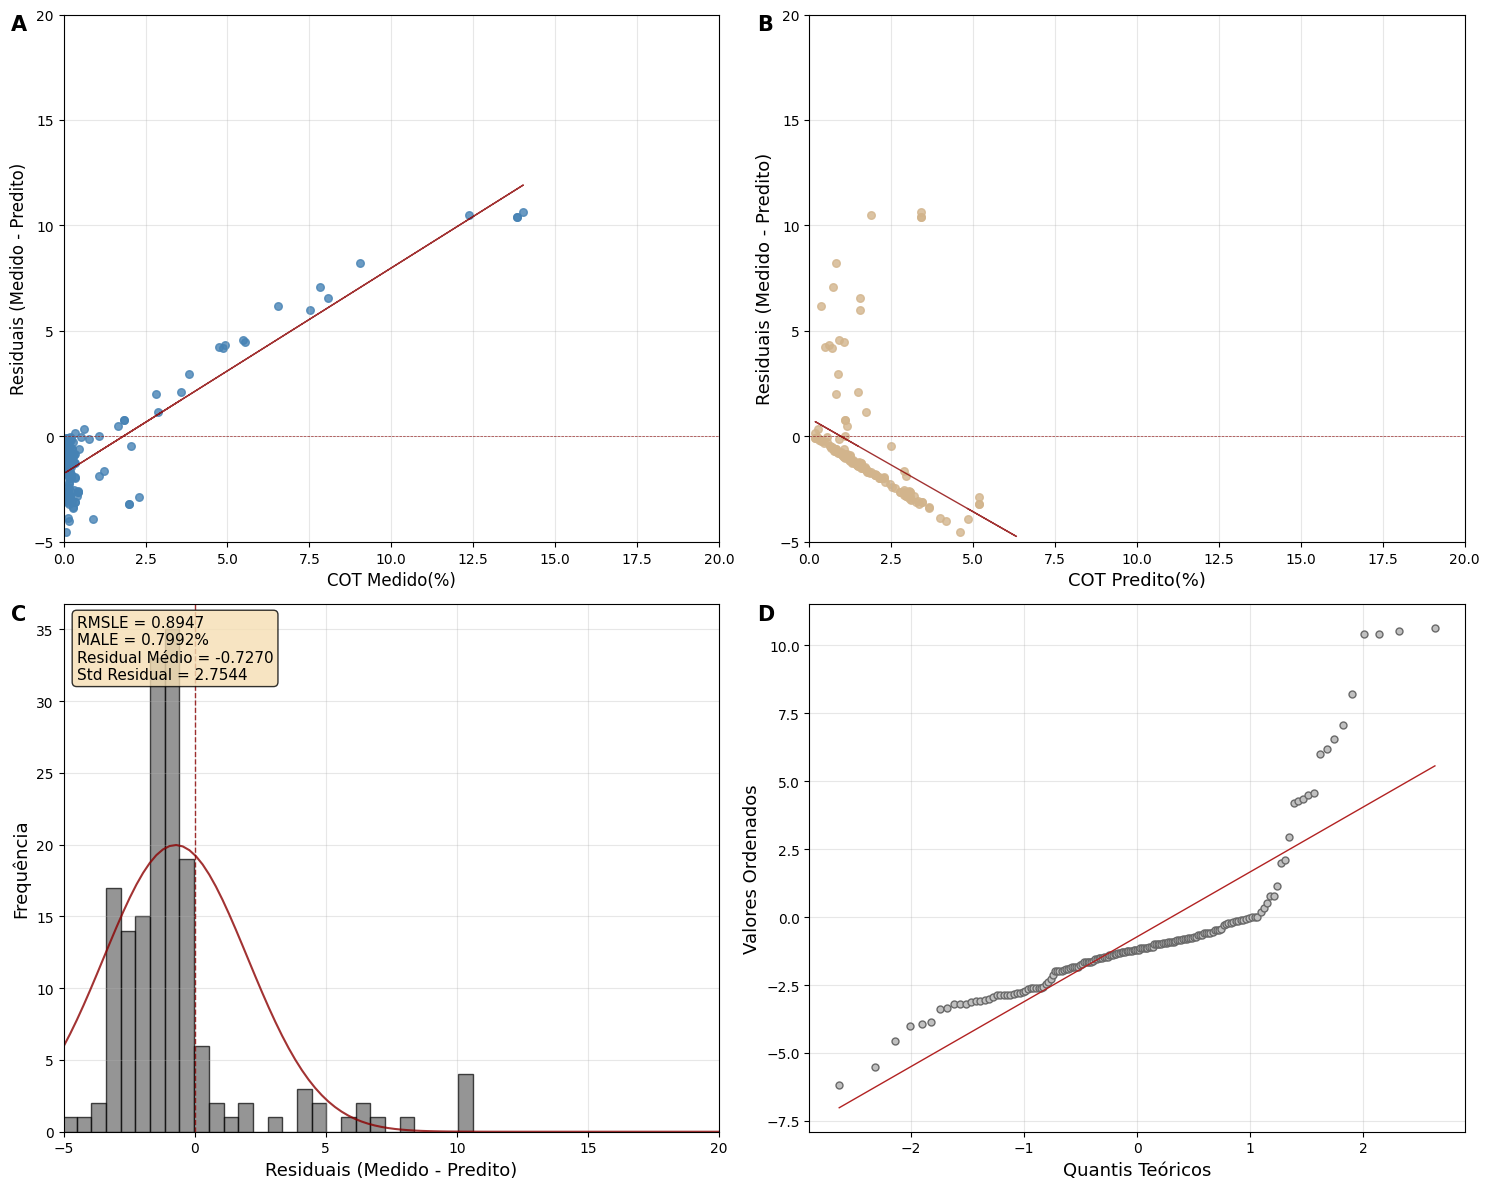

Residual plot for model_9_XGB saved to: results/Relatorio/model_9/dataset_D/residuals/residuals_model_9_XGB_predictions.png


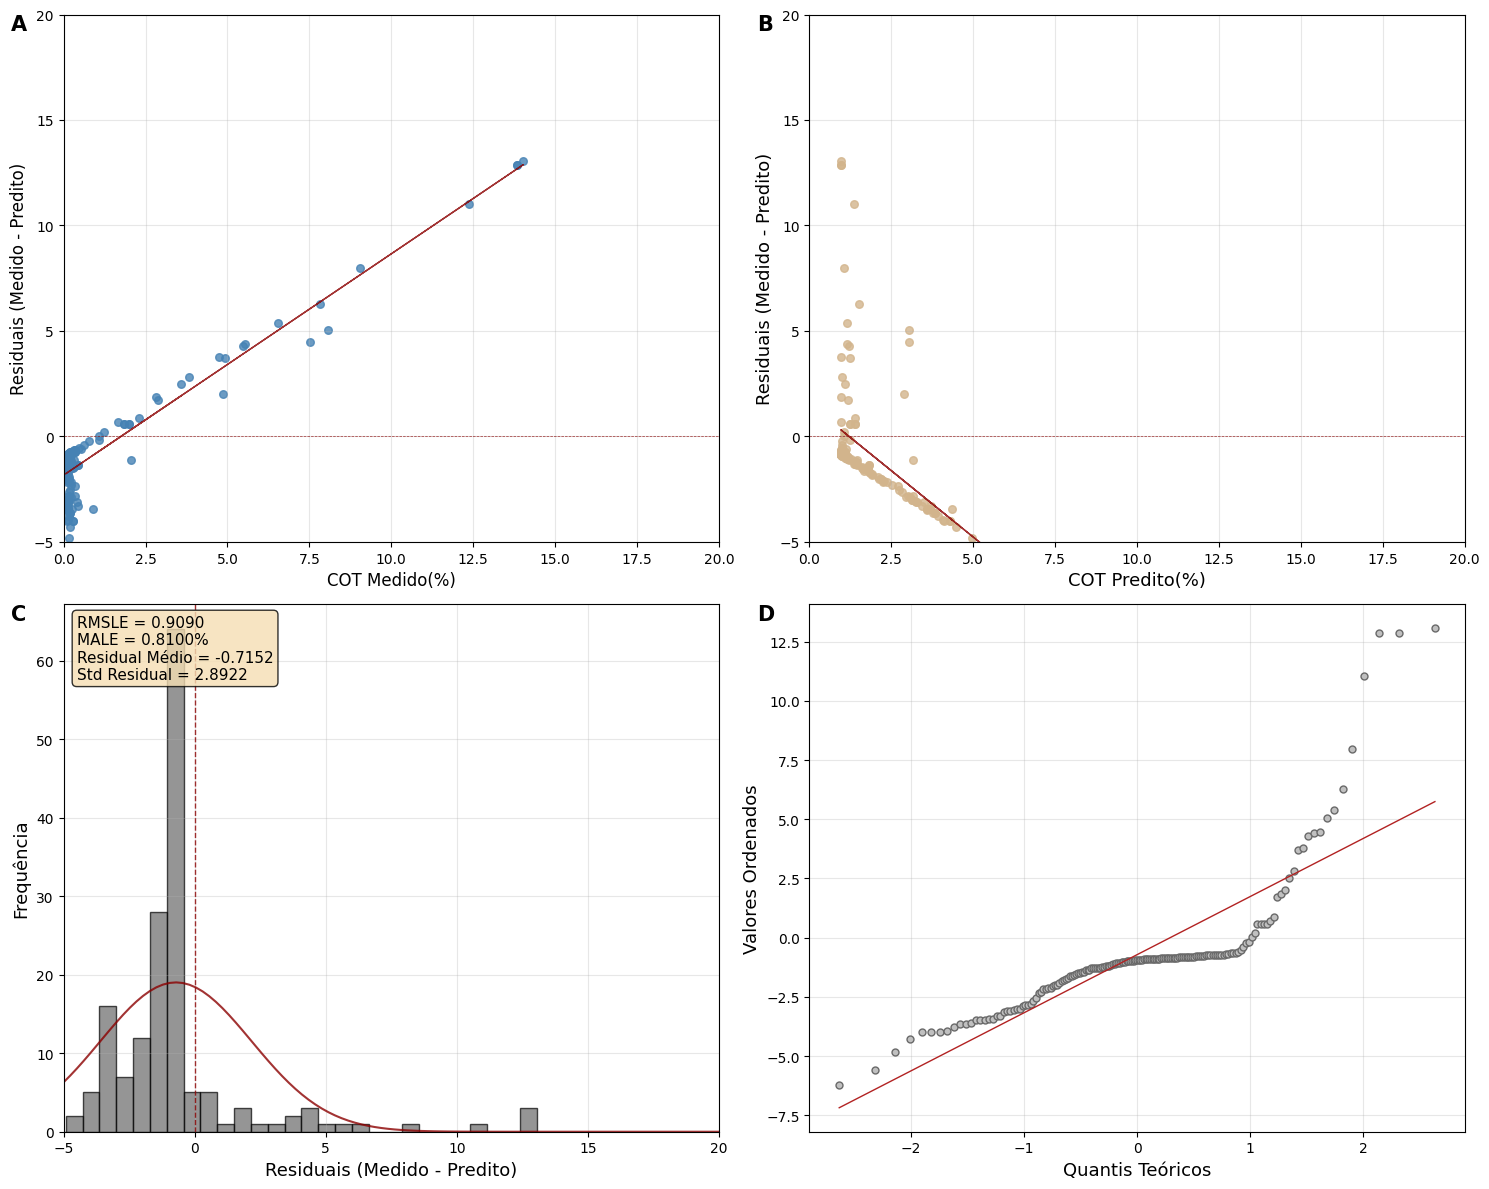

Residuals by combination plot for combination 9 saved to: results/Relatorio/model_9/dataset_D/residuals/residuals_by_combination_9_predictions.png


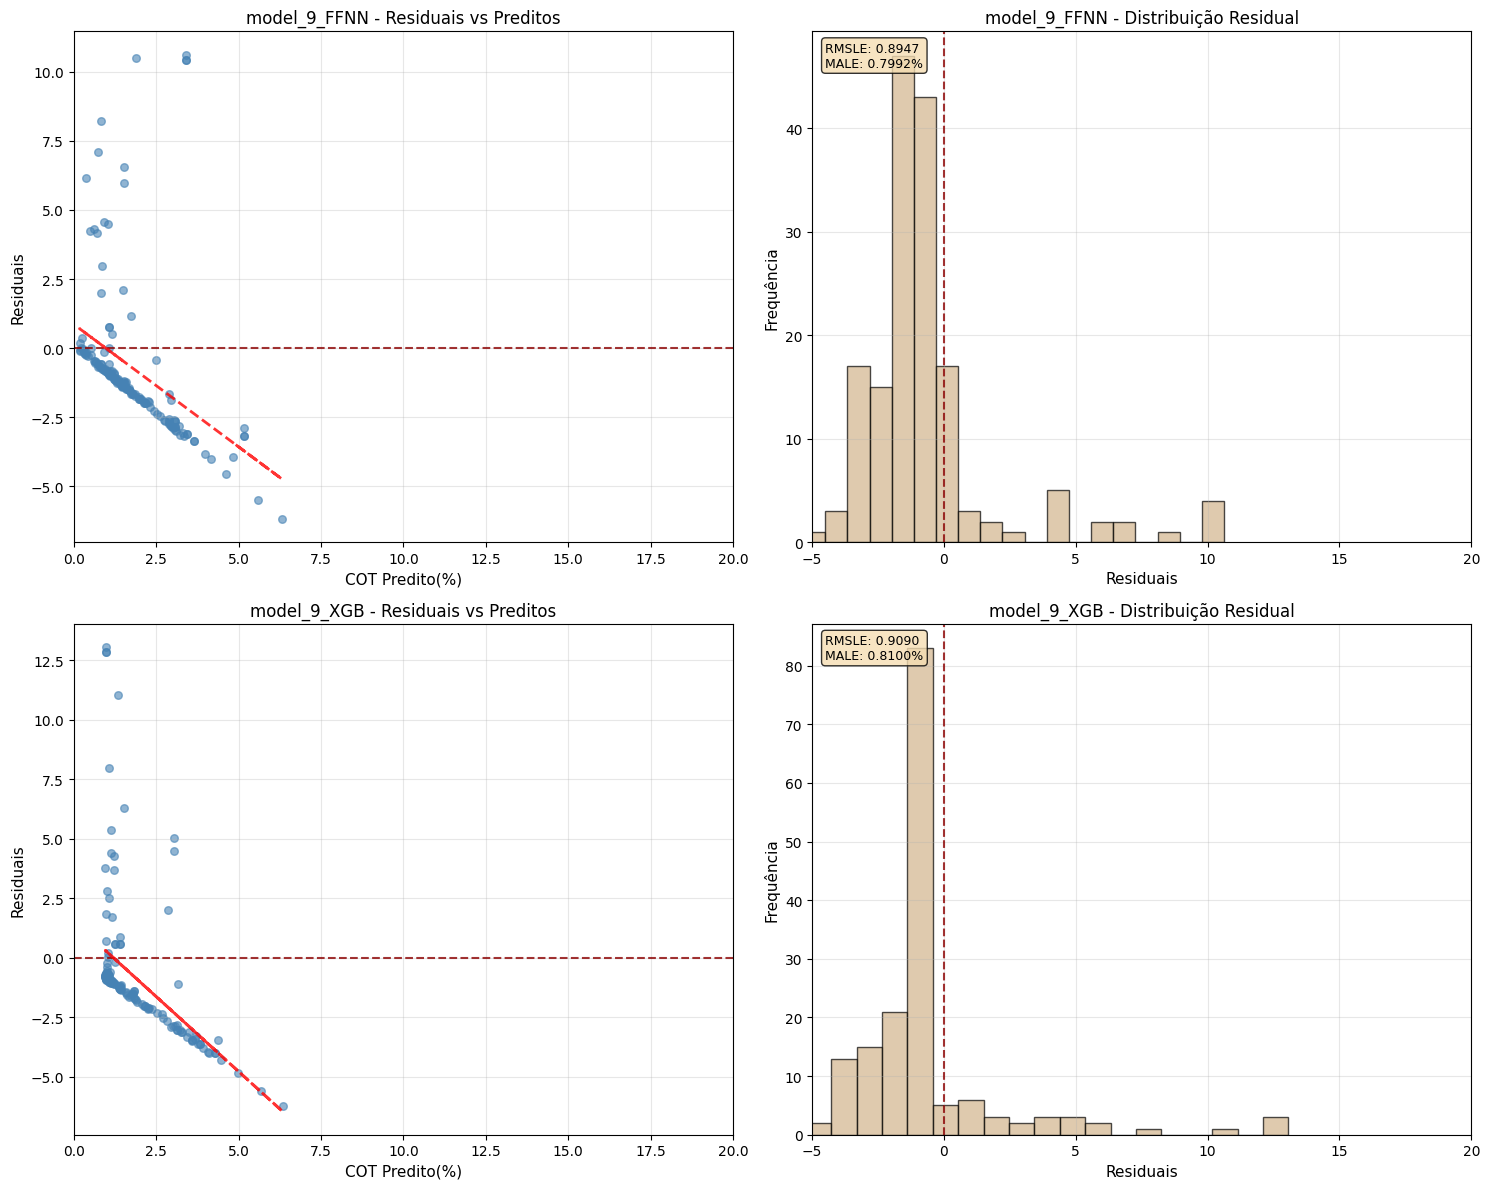


Prediction pipeline completed successfully!
All outputs saved to: results/Relatorio/model_9/dataset_D

[Baseline Check] predicted_COT_model_9_FFNN
=== BASELINE (TOC between 0 and 1) ===
Total of samples: 137
COT Medido: mean=0.196, median=0.155, std=0.126
COT Predito: mean=1.764, median=1.488, std=1.124
Mean error: 1.568
RMSE: 1.922
COT Predito > 1: 104 samples (75.9%)


/home/rodrigo/Desktop/blind_tests/src/models/prediction_utils_relatorio.py:891: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Ideal", color="darkred", linewidth=0.5)


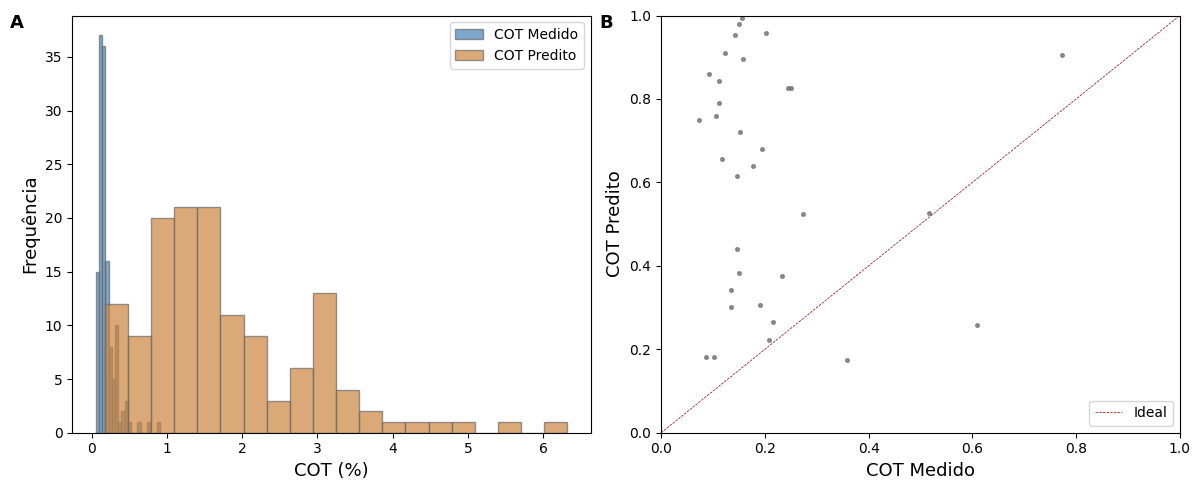


[Baseline Check] predicted_COT_model_9_XGB
=== BASELINE (TOC between 0 and 1) ===
Total of samples: 137
COT Medido: mean=0.196, median=0.155, std=0.126
COT Predito: mean=1.852, median=1.261, std=1.165
Mean error: 1.657
RMSE: 2.023
COT Predito > 1: 107 samples (78.1%)


/home/rodrigo/Desktop/blind_tests/src/models/prediction_utils_relatorio.py:891: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([min_val, max_val], [min_val, max_val], "r--", label="Ideal", color="darkred", linewidth=0.5)


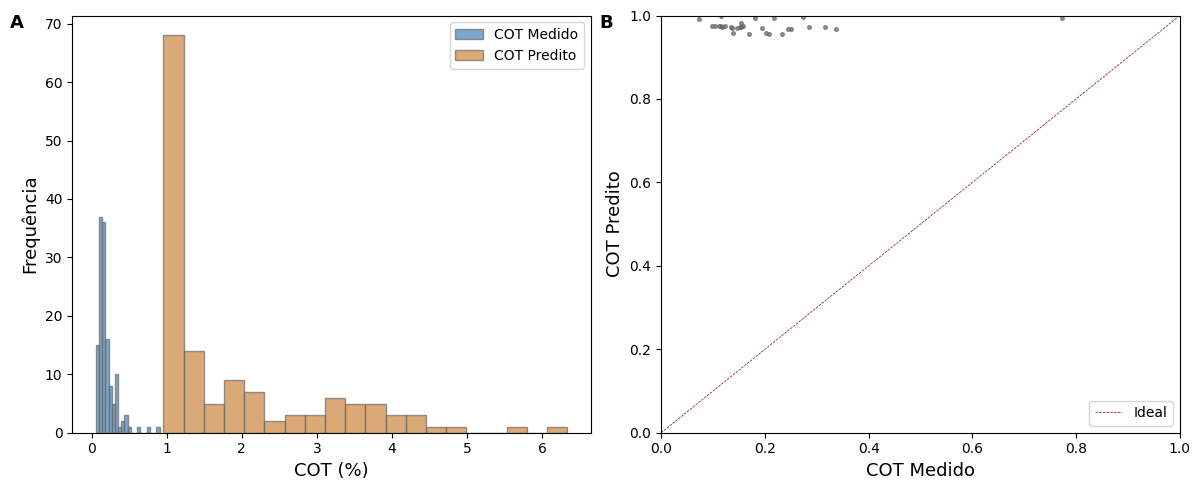


[Baseline Check] predicted_COT_model_9_FFNN
=== BASELINE (TOC between 0 and 1), DEPTH 5200 to 5800 ===
Total of samples: 3
Measured TOC: mean=0.407, median=0.255, std=0.442
Predicted TOC: mean=3.643, median=4.608, std=1.867
Mean error: 3.236
RMSE: 3.540
Predicted TOC > 1: 3 samples (100.0%)


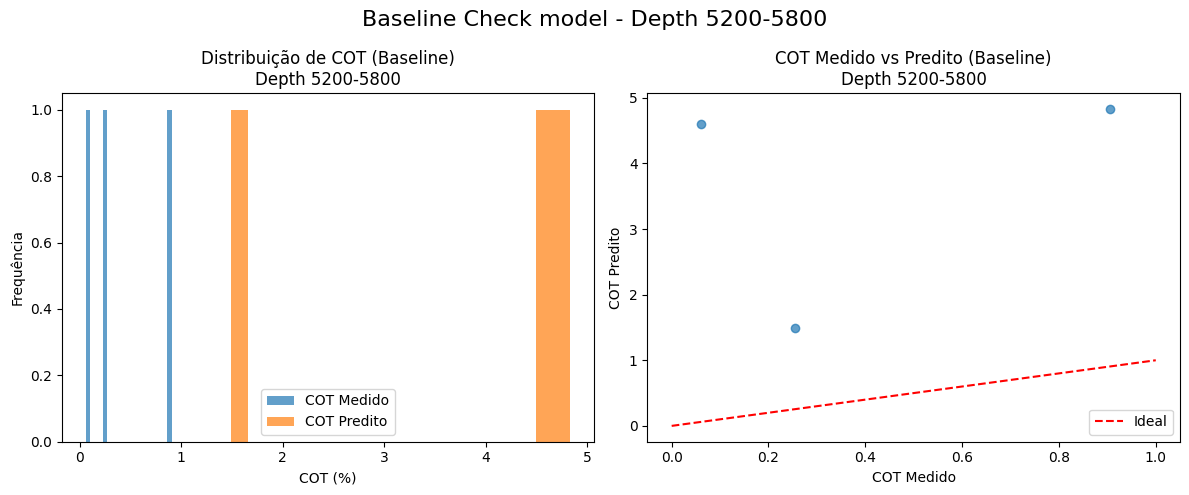


[Baseline Check] predicted_COT_model_9_XGB
=== BASELINE (TOC between 0 and 1), DEPTH 5200 to 5800 ===
Total of samples: 3
Measured TOC: mean=0.407, median=0.255, std=0.442
Predicted TOC: mean=3.029, median=2.953, std=1.300
Mean error: 2.622
RMSE: 2.746
Predicted TOC > 1: 3 samples (100.0%)


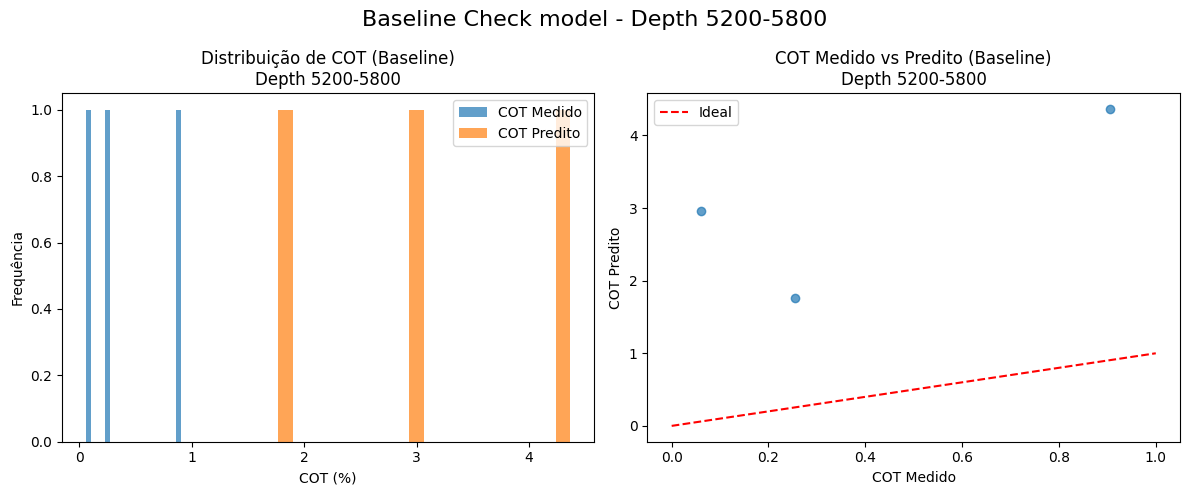


Prediction pipeline completed successfully!
All outputs saved to: results/Relatorio/model_9/dataset_D


In [ ]:
for i in M:
    MODEL = i
    for j in D:
        DATA = f"data/{j}.csv"  
        if __name__ == "__main__":
            print("=" * 80)
            print("TOC PREDICTION - MODEL PREDICTION PIPELINE")
            print("=" * 80)

            # USER CHANGE HERE
            # Change the input data here (dataset_A, dataset_B, dataset_C, etc)
            input_data_user = DATA
            # Change the model folder here (model_1, model_2, model_3, etc)
            model_folder = MODEL


            # -----------------------------------------------------------

            models_dir = f"models/{model_folder}"

            # Extract dataset name from input path
            dataset_name = input_data_user.split('/')[-1].replace('.csv', '')
            output_dir = f"results/relatorio/{model_folder}/{dataset_name}"
            os.makedirs(output_dir, exist_ok=True)

            # Initialize data loader
            data_loader = DataLoader()

            # Load input data based on prediction mode
            print("\nLoading input data...")
            try:
                df = pd.read_csv(input_data_user)
                print(df.head())
                float_cols = df.select_dtypes(include=['float', 'float64', 'float32']).columns
                df[float_cols] = df[float_cols].round(4)
                df.reset_index(drop=True, inplace=True)
                print(f"Data loaded successfully: {df.shape}")
                print(f"Available columns: {list(df.columns)}")
            except Exception as e:
                print(f"Error loading prediction data: {e}")
                exit(1)

            # Load all trained models
            print(f"\nLoading trained models from: {models_dir}")
            models_loaded, models_found = load_all_models(models_dir)

            if not models_found:
                print("No models found to load!")
                print(f"Please check if models exist in: {models_dir}")
                exit(1)


            print(f"\nLoaded {len(models_found)} models:")
            for model_name in models_found:
                print(f"  - {model_name}")

            model_features = {
                'model_1.1_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_1.1_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_2_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_2_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_1.3_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_1.3_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_4_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_4_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_5_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_5_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_6_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_6_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_7_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_7_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_8_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_8_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_9_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_9_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_10_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_10_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_11_FFNN': ['NPHI', 'GR', 'DT', 'RHOB'],
                'model_11_XGB': ['NPHI', 'GR', 'DT', 'RHOB'],
            }

            # Group models by feature combination and find compatible ones
            print(f"\nFinding compatible models based on available features...")
            compatible_models = {}

            for model_name in models_found:
                try:
                    # Get required features from the mapping
                    if model_name in model_features:
                        features = model_features[model_name]

                        # Check if all required features are available in the data
                        missing_features = [f for f in features if f not in df.columns]

                        if not missing_features:
                            # Extract combination_id from model name (e.g., "model_1_FFNN" -> "1")
                            parts = model_name.split('_')
                            combination_id = parts[1] if len(parts) >= 2 else "1"

                            if combination_id not in compatible_models:
                                compatible_models[combination_id] = []
                            compatible_models[combination_id].append(model_name)
                            print(f"✓ {model_name} - Features: {features}")
                        else:
                            print(f"✗ {model_name} - Missing features: {missing_features}")
                    else:
                        print(f"✗ {model_name} - Model not found in features mapping")

                except Exception as e:
                    print(f"✗ Error processing {model_name}: {e}")
                    continue
                
            if not compatible_models:
                print("No compatible models found!")
                print("Available features in data:", list(df.columns))
                exit(1)

            print(f"\nFound {len(compatible_models)} compatible feature combinations:")
            for combo_id, models in compatible_models.items():
                print(f"  Combination {combo_id}: {models}")

            # Make predictions with compatible models
            print(f"\nMaking predictions...")
            predicted_data = df.copy()

            for combo_id, models in compatible_models.items():
                for model_name in models:
                    try:
                        print(f"\nPredicting with {model_name}...")
                        predictions = predict_with_model_and_scalers(models_loaded[model_name], df)

                        if predictions is not None:
                            predictions = np.clip(predictions, 0, None)  # Garante COT >= 0
                            predicted_data[f"predicted_COT_{model_name}"] = predictions
                            print(f"✓ Predictions completed for {model_name}")

                            # Print prediction statistics
                            print(f"  Mean: {predictions.mean():.4f}")
                            print(f"  Std: {predictions.std():.4f}")
                            print(f"  Min: {predictions.min():.4f}")
                            print(f"  Max: {predictions.max():.4f}")
                        else:
                            print(f"✗ Failed to make predictions with {model_name}")

                    except Exception as e:
                        print(f"✗ Error predicting with {model_name}: {e}")
                        continue
                    
            # Save predictions
            print(f"\nSaving predictions...")
            # Arredondar floats para 4 casas decimais antes de salvar
            float_cols = predicted_data.select_dtypes(include=['float', 'float64', 'float32']).columns
            predicted_data[float_cols] = predicted_data[float_cols].round(4)
            predictions_path = os.path.join(output_dir, "predictions.csv")
            predicted_data.to_csv(predictions_path, index=False)
            print(f"Predictions saved to: {predictions_path}")

            # Evaluate models (if COT column exists)
            if 'COT' in predicted_data.columns:
                print(f"\nEvaluating models...")
                compatible_model_names = [model for models in compatible_models.values() for model in models]
                df_metrics = evaluate_models_save_metrics(
                    predicted_data, 
                    compatible_model_names, 
                    output_dir,
                    dataset_name
                )

                if df_metrics is not None:
                    print(f"\nModel evaluation completed!")
                    print(f"Best performing model (lowest RMSE):")
                    best_model = df_metrics.loc[df_metrics['RMSE'].idxmin()]
                    print(f"  {best_model['Model']} - R²: {best_model['R²']:.4f}, R²_log: {best_model['R²_log']:.4f}, RMSE: {best_model['RMSE']:.4f}, MAE: {best_model['MAE']:.4f}, MALE: {best_model['MALE']:.4f}, MAPE: {best_model['MAPE']:.4f}%, RMSLE: {best_model['RMSLE']:.4f}")

            # Create visualization plots
            print(f"\nCreating visualization plots...")

            # Plot predictions comparison by combination
            plot_predictions_by_combination(predicted_data, output_dir, "predictions", compatible_models)
            plot_predictions_by_combination_window(predicted_data, output_dir, "predictions", compatible_models)
            plot_predictions_by_combination_bars_window(predicted_data, output_dir, "predictions", compatible_models)
            plot_predictions_by_combination_bars_window_2(predicted_data, output_dir, "predictions", compatible_models)

            # Plot predicted vs measured
            if 'COT' in predicted_data.columns:
                compatible_model_names = [model for models in compatible_models.values() for model in models]
                plot_pred_vs_measured(predicted_data, output_dir, "predictions", compatible_model_names)

                # Plot residuals
                plot_residuals(predicted_data, output_dir, "predictions", compatible_model_names)

                # Plot residuals by combination
                plot_residuals_by_combination(predicted_data, output_dir, "predictions", compatible_models)

            print(f"\nPrediction pipeline completed successfully!")
            print(f"All outputs saved to: {output_dir}")

            # Check baseline para cada modelo compatível
            if 'COT' in predicted_data.columns:
                for model_name in [model for models in compatible_models.values() for model in models]:
                    model_col = f"predicted_COT_{model_name}"
                    print(f"\n[Baseline Check] {model_col}")
                    check_baseline_predictions(
                        predicted_data,
                        model_col=model_col,
                        output_dir=output_dir,
                        baseline_range=(0, 1),
                        plot=True
                    )
                for model_name in [model for models in compatible_models.values() for model in models]:
                    model_col = f"predicted_COT_{model_name}"
                    print(f"\n[Baseline Check] {model_col}")
                    check_baseline_predictions_depth(
                        predicted_data,
                        model_col=model_col,
                        output_dir=output_dir,
                        baseline_range=(0, 1),
                        depth_min=5200,
                        depth_max=5800,
                        plot=True
                    )
            print(f"\nPrediction pipeline completed successfully!")
            print(f"All outputs saved to: {output_dir}")